In [23]:
import pandas as pd

df = pd.read_csv("data_min_latency.csv")

df

,Unnamed: 0,Resolution,Model,Min Latency
0,0,160,yolo9m,27.789312
1,1,160,yolo10m,23.808199
2,2,160,yolo8m,27.170450
3,3,160,yolo10x,48.629646
4,4,160,yolo8s,16.989407
...,...,...,...,...
75,75,1280,yolo10l,1019.745567
76,76,1280,yolo8s,237.473394
77,77,1280,yolo9s,271.441055
78,78,1280,yolo8l,1217.258215


In [24]:
df["model_name"] = df["Model"]
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["model_size"] = df["model_name"].str[-1]

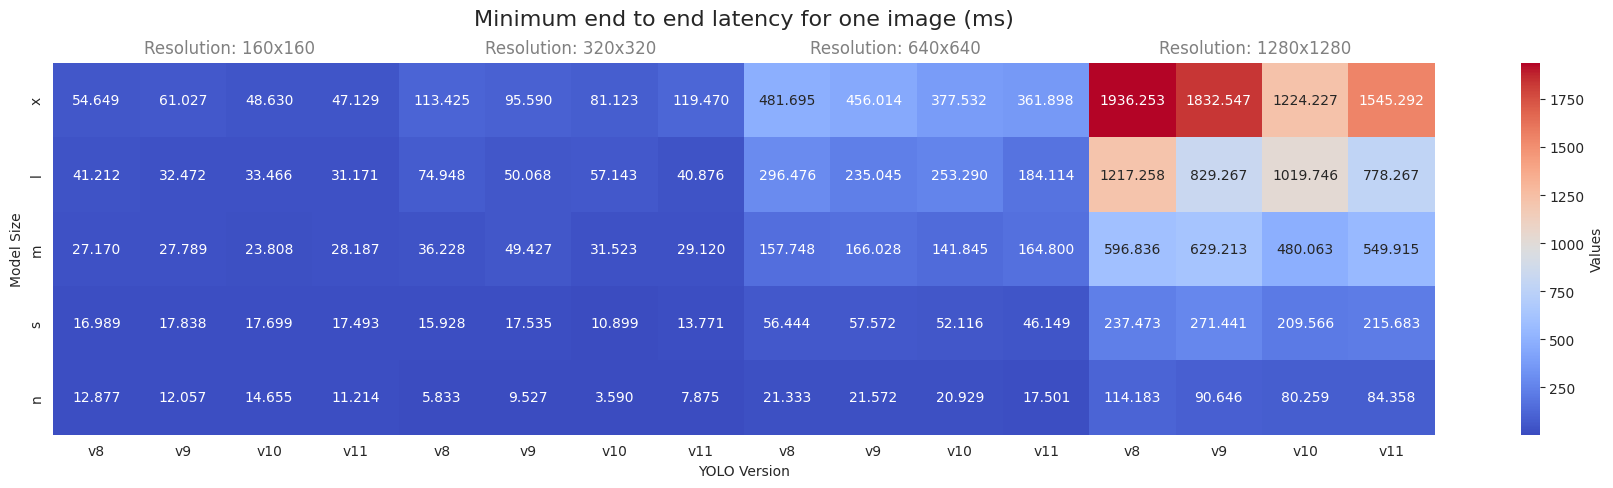

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_min_latency.csv")
df = df.pivot(index="Model", columns="Resolution", values="Min Latency").reset_index()  # Adjust formatting to match other dataframes
# df_pivot
df["model_name"] = df["Model"]
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["model_size"] = df["model_name"].str[-1]
df.columns = df.columns.astype(str)

# Melt the dataframe
df_melted = df.melt(id_vars=["model_size", "yolo_version"], value_vars=["160", "320", "640", "1280"], 
                    var_name="resolution", value_name="value")

# Create a new column combining resolution and yolo_version
df_melted['res_yolo'] = df_melted['resolution'] + '-' + df_melted['yolo_version'].astype(str)

# Pivot the dataframe for heatmap
heatmap_data = df_melted.pivot_table(index='model_size', columns='res_yolo', values='value')

# Sort columns first by resolution then by yolo_version
sorted_cols = sorted(heatmap_data.columns, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
heatmap_data = heatmap_data[sorted_cols]

# Sort the model sizes
model_size_order = ["n", "s", "m", "l", "x"]
model_size_order.reverse()
heatmap_data = heatmap_data.loc[model_size_order]

# Plot the heatmap using seaborn
plt.figure(figsize=(18, 5))  # Adjusted figure size
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Values'})

main_title = f"Minimum end to end latency for one image (ms)"
plt.title(main_title, fontsize=16)
plt.title(main_title, fontsize=16, y=1.08)  # Adjust the `y` parameter here

# Adding subtitles at specific x-coordinates below the main title
title_x_coords = [0.13, 0.32, 0.5, 0.7]
subtitles = ["Resolution: 160x160", "Resolution: 320x320", "Resolution: 640x640", "Resolution: 1280x1280"]

for x, subtitle in zip(title_x_coords, subtitles):
    plt.figtext(x, 0.88, subtitle, ha="center", fontsize=12, color='grey')

# Modify x-labels to add prefix "v"
new_labels = ['v' + lbl.get_text().split('-')[-1] for lbl in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels)
plt.xlabel("YOLO Version")
plt.ylabel("Model Size")
plt.tight_layout()
plt.savefig("yolo_latency_minimum_table.png")
plt.show()

In [26]:
df

Resolution,Model,160,320,640,1280,model_name,yolo_version,model_size
0,yolo10l,33.466463,57.142735,253.289845,1019.745567,yolo10l,10,l
1,yolo10m,23.808199,31.522657,141.844584,480.063034,yolo10m,10,m
2,yolo10n,14.655361,3.590221,20.928507,80.259085,yolo10n,10,n
3,yolo10s,17.699251,10.899492,52.115658,209.566500,yolo10s,10,s
4,yolo10x,48.629646,81.122616,377.532171,1224.227262,yolo10x,10,x
5,yolo11l,31.171352,40.876482,184.114363,778.267218,yolo11l,11,l
6,yolo11m,28.186663,29.119823,164.799524,549.914505,yolo11m,11,m
7,yolo11n,11.213572,7.874540,17.500587,84.358215,yolo11n,11,n
8,yolo11s,17.493019,13.770508,46.149420,215.683294,yolo11s,11,s
9,yolo11x,47.128708,119.470451,361.897779,1545.292191,yolo11x,11,x
